In [37]:
import pandas as pd

import pandas.plotting as  pl

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.figure as fig
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [38]:
df = pd.read_excel('flight.xlsx')

In [39]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [40]:
df.shape

(10683, 11)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [42]:
# adding duration hours and duration min list to list to train_data dataframe

df['Dep_hour'] = pd.to_datetime(df["Dep_Time"]).dt.hour

In [43]:
df['Dep_min'] = pd.to_datetime(df["Dep_Time"]).dt.minute

In [44]:
df['Arrival_Time'] = pd.to_datetime(df["Arrival_Time"]).dt.hour

In [45]:
df['Arrival_Time'] = pd.to_datetime(df["Arrival_Time"]).dt.minute

In [46]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Dep_hour,Dep_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,0,2h 50m,non-stop,No info,3897,22,20
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,0,7h 25m,2 stops,No info,7662,5,50
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,0,19h,2 stops,No info,13882,9,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,0,5h 25m,1 stop,No info,6218,18,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,0,4h 45m,1 stop,No info,13302,16,50


In [47]:
len("2h 50m".split())

2

In [48]:
len("19h".split())

1

In [51]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration


In [52]:
# Adding duration_hours and duration_mins list to train_data dataframe

df["Duration_hours"] = duration_hours
df["Duration_mins"] = duration_mins

In [53]:
df.drop(["Duration"], axis = 1, inplace = True)

In [54]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Dep_hour,Dep_min,Duration_hours,Duration_mins
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,0,non-stop,No info,3897,22,20,2,50
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,0,2 stops,No info,7662,5,50,7,25
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,0,2 stops,No info,13882,9,25,19,0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,0,1 stop,No info,6218,18,5,5,25
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,0,1 stop,No info,13302,16,50,4,45


In [55]:
df["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [56]:
#sns.catplot(y = "Price", x = "Airline", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
#plt.show()

<AxesSubplot:xlabel='Price', ylabel='count'>

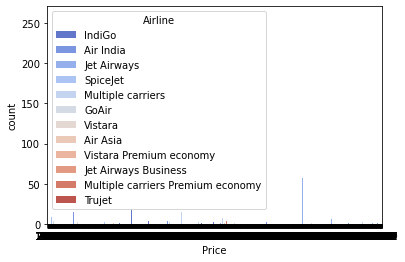

In [57]:
sns.countplot(df["Price"],palette="coolwarm",hue="Airline",data=df)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  int32 
 1   Date_of_Journey  10683 non-null  int32 
 2   Source           10683 non-null  int32 
 3   Destination      10683 non-null  int32 
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  int64 
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
 10  Dep_hour         10683 non-null  int64 
 11  Dep_min          10683 non-null  int64 
 12  Duration_hours   10683 non-null  int64 
 13  Duration_mins    10683 non-null  int64 
dtypes: int32(4), int64(6), object(4)
memory usage: 1001.7+ KB


In [62]:
df.drop("Route", axis = 1, inplace = True)

In [63]:
df.drop("Additional_Info", axis = 1, inplace = True)

In [64]:
df.drop("Arrival_Time", axis = 1, inplace = True)

In [65]:
df.drop("Total_Stops", axis = 1, inplace = True)

In [ ]:
df.drop("Dep_Time", axis = 1, inplace = True)

In [67]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Price,Dep_hour,Dep_min,Duration_hours,Duration_mins
0,3,24,0,5,3897,22,20,2,50
1,1,6,3,0,7662,5,50,7,25
2,4,43,2,1,13882,9,25,19,0
3,3,10,3,0,6218,18,5,5,25
4,3,0,0,5,13302,16,50,4,45


In [68]:
df.shape

(10683, 9)

# Skewness

In [69]:
df.skew()

Airline            0.731095
Date_of_Journey   -0.070888
Source            -0.424054
Destination        1.244169
Price              1.812552
Dep_hour           0.113073
Dep_min            0.167029
Duration_hours     0.850862
Duration_mins     -0.090841
dtype: float64

# Visualization

<AxesSubplot:>

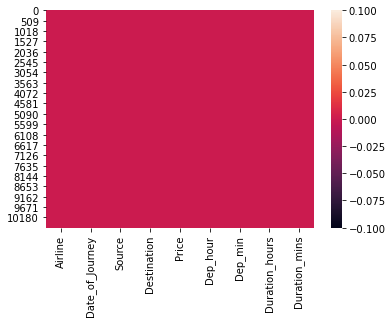

In [70]:
sns.heatmap(df.isnull())# null value is not available at the this data set.

# To check correlation

In [71]:
dfcor = df.corr() 
dfcor

,Airline,Date_of_Journey,Source,Destination,Price,Dep_hour,Dep_min,Duration_hours,Duration_mins
Airline,1.000000,0.022251,-0.013401,0.018479,-0.039520,-0.035194,-0.060044,-0.158285,-0.028088
Date_of_Journey,0.022251,1.000000,0.167549,-0.273357,-0.036942,-0.005145,-0.053274,0.029452,-0.047190
Source,-0.013401,0.167549,1.000000,-0.592574,0.015998,0.059044,-0.056991,0.166109,-0.145187
Destination,0.018479,-0.273357,-0.592574,1.000000,-0.071112,-0.072979,0.127892,-0.258459,0.061214
Price,-0.039520,-0.036942,0.015998,-0.071112,1.000000,0.006819,-0.024492,0.508672,-0.124874
Dep_hour,-0.035194,-0.005145,0.059044,-0.072979,0.006819,1.000000,-0.024806,0.002783,-0.023746
Dep_min,-0.060044,-0.053274,-0.056991,0.127892,-0.024492,-0.024806,1.000000,-0.021946,0.092548
Duration_hours,-0.158285,0.029452,0.166109,-0.258459,0.508672,0.002783,-0.021946,1.000000,-0.126355
Duration_mins,-0.028088,-0.047190,-0.145187,0.061214,-0.124874,-0.023746,0.092548,-0.126355,1.000000


<AxesSubplot:>

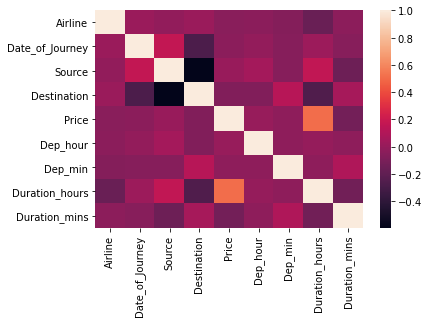

In [72]:
sns.heatmap(dfcor)

<AxesSubplot:>

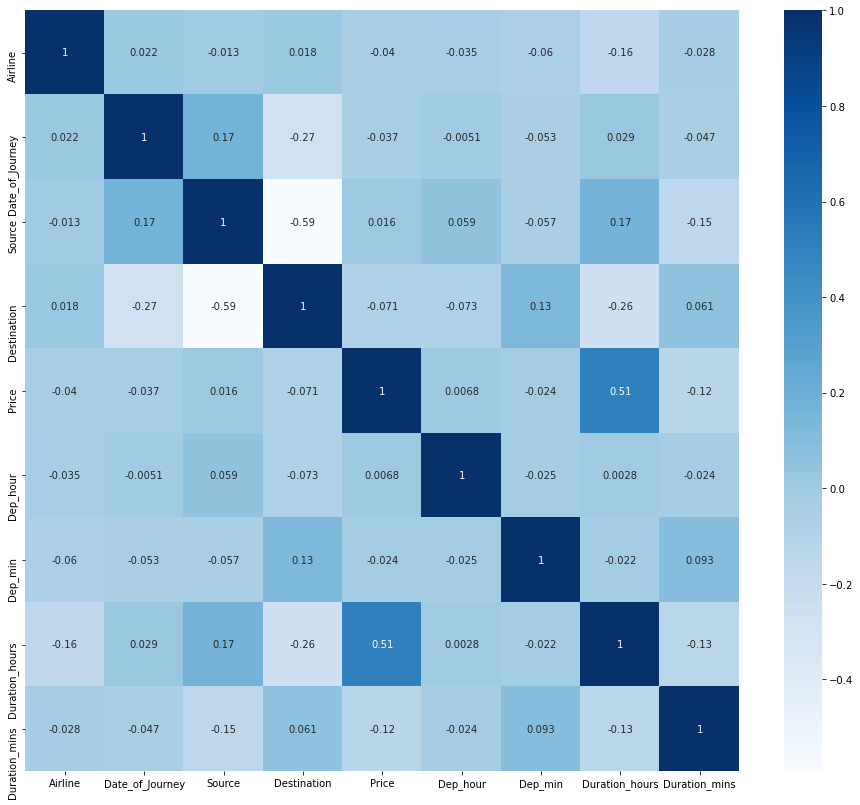

In [73]:
plt.figure(figsize=(16,14))
sns.heatmap(dfcor,cmap='Blues',annot=True)

In [74]:
df['Airline'].value_counts()

4     3849
3     2053
1     1752
6     1196
8      818
10     479
0      319
2      194
7       13
5        6
11       3
9        1
Name: Airline, dtype: int64

In [77]:
df['Price'].value_counts()

10262    258
10844    212
7229     162
4804     160
4823     131
        ... 
9502       1
13875      1
7742       1
5703       1
4098       1
Name: Price, Length: 1870, dtype: int64

<AxesSubplot:xlabel='Price', ylabel='count'>

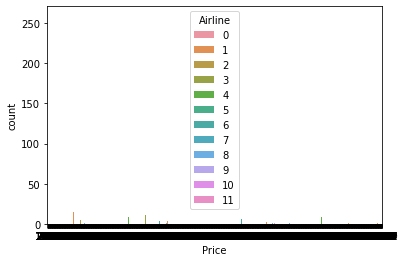

In [75]:
sns.countplot(x="Price", hue="Airline",data=df)
#sns.countplot(df["Price"],palette="coolwarm",hue="Airline",data=df)

In [78]:
df['Source'].value_counts()

2    4537
3    2871
0    2197
4     697
1     381
Name: Source, dtype: int64

<AxesSubplot:xlabel='Source', ylabel='count'>

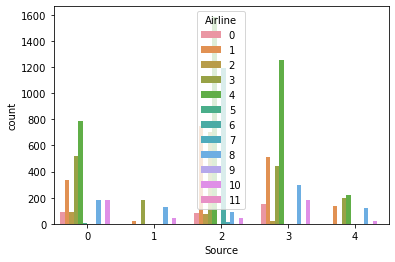

In [76]:
sns.countplot(x="Source", hue="Airline",data=df)

In [79]:
df['Destination'].value_counts()

1    4537
0    2871
2    1265
5     932
3     697
4     381
Name: Destination, dtype: int64

<AxesSubplot:xlabel='Destination', ylabel='count'>

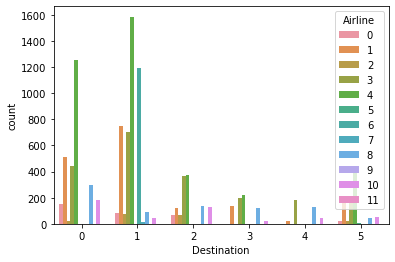

In [80]:
sns.countplot(x="Destination", hue="Airline",data=df)

In [81]:
df['Dep_hour'].value_counts()

9     916
7     867
8     697
17    695
6     687
20    651
5     629
11    580
19    567
10    536
14    523
21    492
16    472
18    444
13    417
22    387
15    319
2     194
12    178
4     170
23    161
0      40
1      37
3      24
Name: Dep_hour, dtype: int64

<AxesSubplot:xlabel='Dep_hour', ylabel='count'>

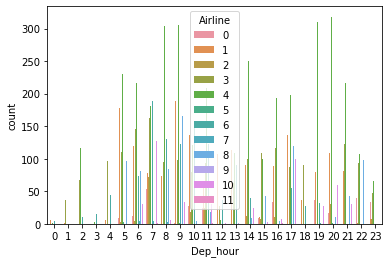

In [82]:
sns.countplot(x="Dep_hour", hue="Airline",data=df)

In [83]:
df['Dep_min'].value_counts()

0     2062
30    1215
55    1058
10     890
45     876
5      773
15     692
25     691
20     666
35     665
50     591
40     504
Name: Dep_min, dtype: int64

<AxesSubplot:xlabel='Dep_min', ylabel='count'>

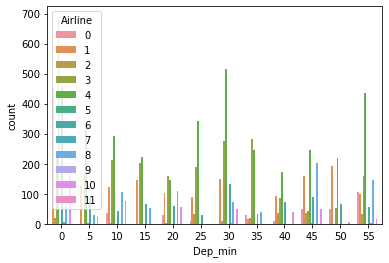

In [84]:
sns.countplot(x="Dep_min", hue="Airline",data=df)

In [85]:
df['Duration_hours'].value_counts()

2     2402
1      621
3      501
7      487
5      481
9      445
12     428
8      424
13     407
11     365
10     355
6      340
14     337
15     268
23     265
26     241
16     234
4      222
22     218
24     197
21     196
25     186
27     179
20     162
18     141
19     134
17     129
28      94
29      65
30      49
38      34
37      17
33      13
32       9
34       8
35       7
36       7
31       6
47       2
42       2
39       2
40       1
41       1
0        1
Name: Duration_hours, dtype: int64

<AxesSubplot:xlabel='Duration_hours', ylabel='count'>

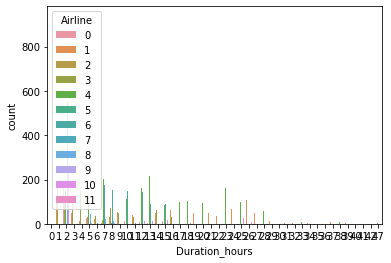

In [86]:
sns.countplot(x="Duration_hours", hue="Airline",data=df)

In [87]:
df['Duration_mins'].value_counts()

30    1446
0     1031
20     997
50     972
35     939
55     910
15     903
45     896
25     803
40     637
5      624
10     525
Name: Duration_mins, dtype: int64

<AxesSubplot:xlabel='Duration_mins', ylabel='count'>

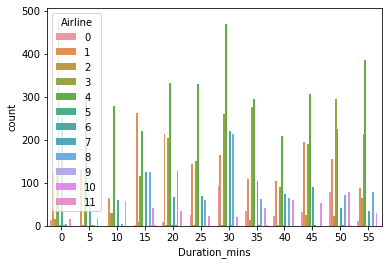

In [88]:
sns.countplot(x="Duration_mins", hue="Airline",data=df)

# Plotting Outlier

In [89]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Price',
       'Dep_hour', 'Dep_min', 'Duration_hours', 'Duration_mins'],
      dtype='object')

<AxesSubplot:>

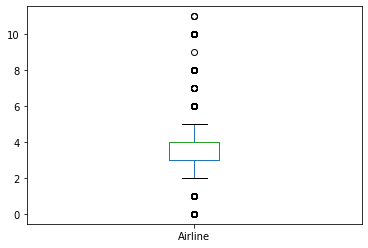

In [90]:
df['Airline'].plot.box() 

<AxesSubplot:>

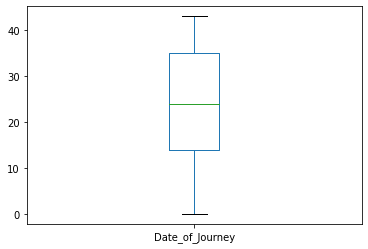

In [91]:
df['Date_of_Journey'].plot.box() 

<AxesSubplot:>

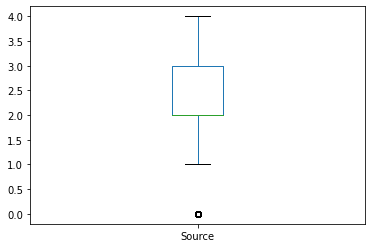

In [92]:
df['Source'].plot.box() 

<AxesSubplot:>

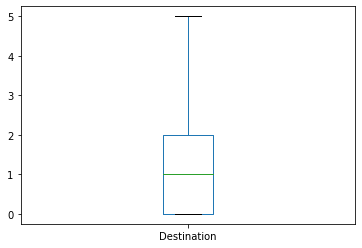

In [93]:
df['Destination'].plot.box() 

<AxesSubplot:>

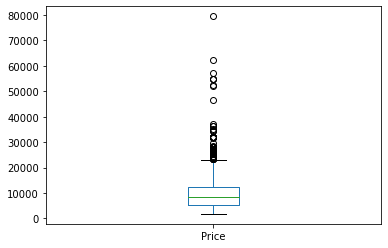

In [94]:
df['Price'].plot.box() 

<AxesSubplot:>

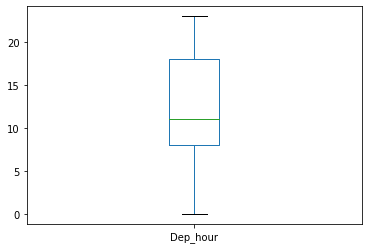

In [95]:
df['Dep_hour'].plot.box() 

<AxesSubplot:>

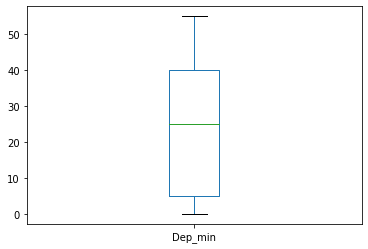

In [96]:
df['Dep_min'].plot.box() 

<AxesSubplot:>

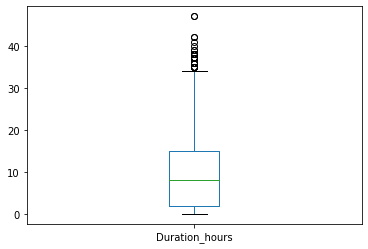

In [97]:
df['Duration_hours'].plot.box() 

<AxesSubplot:>

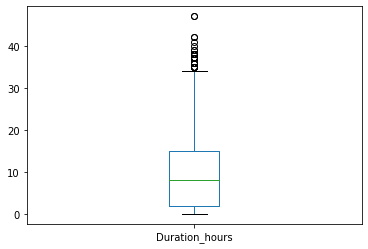

In [98]:
df['Duration_hours'].plot.box() 

# Remove Outlier

In [128]:
from scipy.stats import zscore 
z=np.abs(zscore(df))
z

array([[0.41067545, 0.02147223, 1.65844074, ..., 0.97069753, 1.27900775,
        1.12554821],
       [1.26099927, 1.4375315 , 0.89005213, ..., 0.38211718, 0.19638797,
        0.30904789],
       [0.01448647, 1.56153172, 0.04055451, ..., 1.03047566, 1.67178369,
        1.03985835],
       ...,
       [0.01448647, 0.42675104, 1.65844074, ..., 0.85298146, 1.67178369,
        0.40295085],
       [2.56545795, 1.92386608, 1.65844074, ..., 0.97069753, 0.68884946,
        0.77224576],
       [1.26099927, 1.48047596, 0.04055451, ..., 0.26440111, 0.49146712,
        0.57815073]])

In [129]:
threshold=3
print(np.where(z>3))

(array([  123,   226,   396,   486,   510,   553,   597,   628,   657,
         785,   826,   936,   946,   959,   966,   969,   975,  1067,
        1113,  1196,  1246,  1341,  1346,  1424,  1442,  1466,  1478,
        1496,  1551,  1629,  1654,  1657,  1785,  1791,  1804,  1918,
        2055,  2099,  2108,  2172,  2495,  2553,  2556,  2618,  2635,
        2641,  2654,  2693,  2718,  2924,  3032,  3111,  3257,  3400,
        3457,  3535,  3700,  3790,  3815,  3966,  4012,  4047,  4118,
        4463,  4521,  4655,  4676,  4829,  5013,  5136,  5372,  5439,
        5516,  5662,  5701,  5701,  5710,  5711,  5719,  5738,  5745,
        5782,  5856,  5933,  5953,  5986,  6059,  6085,  6314,  6321,
        6407,  6476,  6576,  6588,  6605,  6884,  6991,  7189,  7232,
        7306,  7329,  7351,  7356,  7377,  7537,  7553,  7554,  7611,
        7612,  7617,  7713,  7724,  7756,  7876,  7902,  7906,  8020,
        8080,  8127,  8153,  8360,  8409,  8412,  8451,  8470,  8536,
        8598,  8601

In [130]:
df_new = df[(z<3).all(axis=1)]

In [131]:
df_new.head()

,Airline,Date_of_Journey,Source,Destination,Dep_hour,Dep_min,Duration_hours,Duration_mins,Pricef
0,3,24,0,5,22,20,2,50,3897
1,1,6,3,0,5,50,7,25,7662
2,4,43,2,1,9,25,19,0,13882
3,3,10,3,0,18,5,5,25,6218
4,3,0,0,5,16,50,4,45,13302


In [132]:
df_new.shape

(10522, 9)

In [133]:
#for spliting into x and y we have to push price in the last.

In [135]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_hour,Dep_min,Duration_hours,Duration_mins,Pricef
0,3,24,0,5,22,20,2,50,3897
1,1,6,3,0,5,50,7,25,7662
2,4,43,2,1,9,25,19,0,13882
3,3,10,3,0,18,5,5,25,6218
4,3,0,0,5,16,50,4,45,13302


In [157]:

df_new['Pricef'] = df_new['Price']

In [138]:
df_new.head()

,Airline,Date_of_Journey,Source,Destination,Dep_hour,Dep_min,Duration_hours,Duration_mins,Pricef
0,3,24,0,5,22,20,2,50,3897
1,1,6,3,0,5,50,7,25,7662
2,4,43,2,1,9,25,19,0,13882
3,3,10,3,0,18,5,5,25,6218
4,3,0,0,5,16,50,4,45,13302


In [139]:
#Spliting the data into x and y
x=df.iloc[:,: -1]

In [140]:
x.head()

,Airline,Date_of_Journey,Source,Destination,Dep_hour,Dep_min,Duration_hours,Duration_mins
0,3,24,0,5,22,20,2,50
1,1,6,3,0,5,50,7,25
2,4,43,2,1,9,25,19,0
3,3,10,3,0,18,5,5,25
4,3,0,0,5,16,50,4,45


In [141]:
y=df.iloc[:,-1]

In [142]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Pricef, dtype: int64

In [143]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 30)

# StandardScalar

In [144]:
from sklearn.preprocessing import StandardScaler
# creating a standard scaler
sc = StandardScaler()
# feeding independents sets into the standard scaler
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

# We are using Regression algorithm.

In [145]:
from sklearn.linear_model import LinearRegression
# creating the Linear Regression model
lR = LinearRegression()
# putting the training data to the model
lR.fit(x_train, y_train)
y_pred_lR = lR.predict(x_test)
lR.score(x_train,y_train)

0.2738459103602128

In [146]:
pred=lR.predict(x_test)
print ("predict the result :",pred)
print("actual price",y_test)

predict the result : [ 8443.49073598  6712.53781799  9539.56757655 ...  9105.22950124
 12682.71873849  7815.46271629]
actual price 8703     11467
3407      3841
10351    22294
2699     12898
9958      8937
         ...  
10647     4466
4482     14714
5724     13587
10018    10577
467       7408
Name: Pricef, Length: 2137, dtype: int64


In [147]:
#Error metrics for find the error algorithm
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [148]:
print('error')
print('mean absoulte error', mean_absolute_error(y_test,pred))
print("mean squared error",mean_squared_error(y_test,pred))

print("root mean squared error",np.sqrt(mean_squared_error(y_test,pred)))

error
mean absoulte error 2892.4593884432693
mean squared error 15736527.56506429
root mean squared error 3966.929236205795


# Support Vector Regression

In [149]:
from sklearn.svm import SVR
# creating the model
svr = SVR()
# feeding the training data to the model
svr.fit(x_train, y_train)
# predicting the test set results
y_pred_svr = svr.predict(x_test)
svr.score(x_train,y_train)

0.025572330448081604

# RandomForestRegressor

In [150]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(x_train, y_train)
# Predicting a new result
y_pred = regressor.predict(x_test)
regressor.score(x_train,y_train)

0.9341666138348019

# Test data set of the flight

In [178]:
df1 = pd.read_excel('tfilght.xlsx')

In [179]:
df1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [180]:
df1.shape

(2671, 10)

In [181]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [182]:
df1.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [183]:
df1.drop("Route", axis = 1, inplace = True)

In [184]:
df1.drop("Additional_Info",axis=1, inplace=True)

In [185]:
df1.drop("Date_of_Journey",axis=1,inplace=True)

In [186]:
df1.drop("Source", axis=1, inplace=True)

In [187]:
df1.drop("Destination", axis=1, inplace=True)

In [189]:
df1.head()

,Airline,Dep_Time,Arrival_Time,Duration,Total_Stops
0,Jet Airways,17:30,04:25 07 Jun,10h 55m,1 stop
1,IndiGo,06:20,10:20,4h,1 stop
2,Jet Airways,19:15,19:00 22 May,23h 45m,1 stop
3,Multiple carriers,08:00,21:00,13h,1 stop
4,Air Asia,23:55,02:45 25 Jun,2h 50m,non-stop


In [ ]:
len("2h 50m".split()) # there we check the length of the duration

In [191]:
# Duration
duration = list(df1["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins if length more than 2 it's not get excute
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute iterate the value and add the with the min 
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour iterate the value and add the with the min

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [192]:
# Dep_Time
df1["Dep_hour"] = pd.to_datetime(df1["Dep_Time"]).dt.hour
df1["Dep_min"] = pd.to_datetime(df1["Dep_Time"]).dt.minute
df1.drop(["Dep_Time"], axis = 1, inplace = True)



In [193]:
# Arrival_Time
df1["Arrival_hour"] = pd.to_datetime(df1.Arrival_Time).dt.hour
df1["Arrival_min"] = pd.to_datetime(df1.Arrival_Time).dt.minute
df1.drop(["Arrival_Time"], axis = 1, inplace = True)

In [201]:
# Adding Duration column to test set
df1["Duration_hours"] = duration_hours
df1["Duration_mins"] = duration_mins
df1.drop(["Duration"], axis = 1, inplace = True)

In [202]:
df1.head()

,Total_Stops,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,1,17,30,4,25,10,55
1,1,6,20,10,20,4,0
2,1,19,15,19,0,23,45
3,1,8,0,21,0,13,0
4,0,23,55,2,45,2,50


In [226]:
# Replacing Total_Stops
df1.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [204]:
df1.head()

,Total_Stops,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,1,17,30,4,25,10,55
1,1,6,20,10,20,4,0
2,1,19,15,19,0,23,45
3,1,8,0,21,0,13,0
4,0,23,55,2,45,2,50


In [207]:
df1.drop("Airline",axis=1,inplace=True)

In [208]:
df1['Duration_mins'].value_counts()

30    372
20    263
45    258
0     253
50    233
15    232
55    211
35    210
25    206
40    166
5     145
10    122
Name: Duration_mins, dtype: int64

# Visualization



In [ ]:
#To check correlation

In [209]:
dfcor1 = df.corr() 
dfcor1

,Total_Stops,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
Total_Stops,1.000000,-0.108388,0.009389,0.033027,-0.113292,0.734442,-0.116024
Dep_hour,-0.108388,1.000000,-0.034524,0.000147,0.066751,-0.019739,-0.022836
Dep_min,0.009389,-0.034524,1.000000,0.046824,-0.020065,0.020907,0.091169
Arrival_hour,0.033027,0.000147,0.046824,1.000000,-0.136215,0.052277,-0.124326
Arrival_min,-0.113292,0.066751,-0.020065,-0.136215,1.000000,-0.079484,0.175481
Duration_hours,0.734442,-0.019739,0.020907,0.052277,-0.079484,1.000000,-0.091420
Duration_mins,-0.116024,-0.022836,0.091169,-0.124326,0.175481,-0.091420,1.000000


<AxesSubplot:>

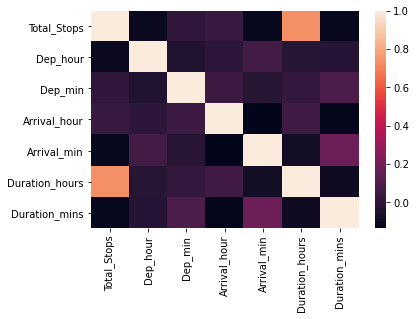

In [213]:
sns.heatmap(dfcor1)

<AxesSubplot:>

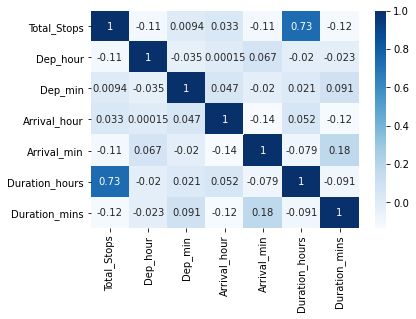

In [217]:
plt.figure(figsize=(6,4))
sns.heatmap(dfcor1,cmap='Blues',annot=True)


# Plotting Outlier



In [228]:
df1.columns

Index(['Total_Stops', 'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min',
       'Duration_hours', 'Duration_mins'],
      dtype='object')

<AxesSubplot:>

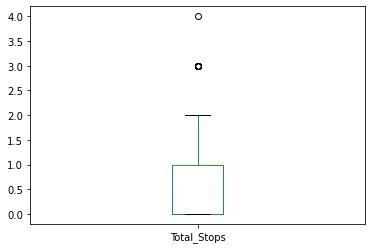

In [229]:
df1['Total_Stops'].plot.box()

<AxesSubplot:>

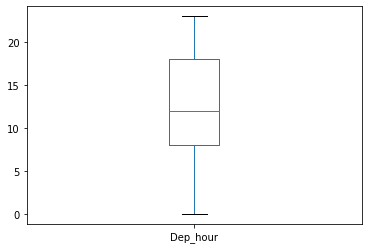

In [230]:
df1['Dep_hour'].plot.box()

<AxesSubplot:>

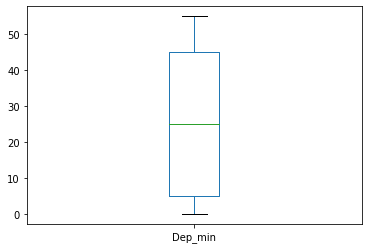

In [231]:
df1['Dep_min'].plot.box()

<AxesSubplot:>

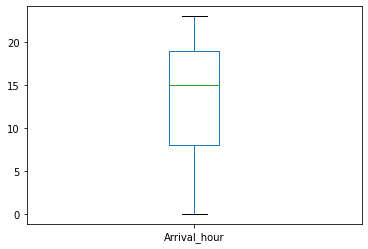

In [232]:
df1['Arrival_hour'].plot.box()

<AxesSubplot:>

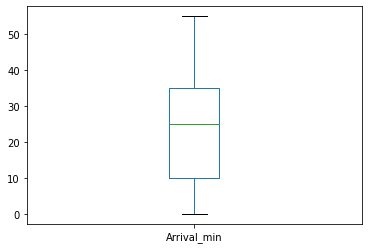

In [233]:
df1['Arrival_min'].plot.box()

<AxesSubplot:>

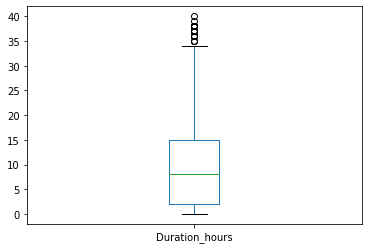

In [234]:
df1['Duration_hours'].plot.box()

<AxesSubplot:>

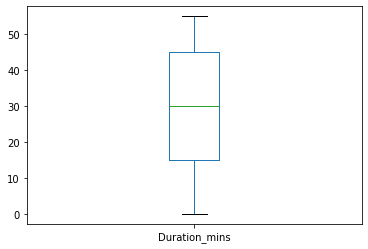

In [235]:
df1['Duration_mins'].plot.box()

In [236]:
df1.head()

,Total_Stops,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,1,17,30,4,25,10,55
1,1,6,20,10,20,4,0
2,1,19,15,19,0,23,45
3,1,8,0,21,0,13,0
4,0,23,55,2,45,2,50


In [242]:
x1=df1

In [243]:
x1.head()

,Total_Stops,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,1,17,30,4,25,10,55
1,1,6,20,10,20,4,0
2,1,19,15,19,0,23,45
3,1,8,0,21,0,13,0
4,0,23,55,2,45,2,50


In [244]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Pricef, dtype: int64